In [140]:
from __future__ import division 
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [141]:
img = np.zeros((512,512,3), np.uint8)
img[:,:] = (255, 255, 255)
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
img = cv2.polylines(img,[pts],True,(100, 100, 100))

In [142]:
A1 = np.array( [
      [5.8479532e-01,  -1.9354839e+00],
      [2.3859649e+00,   1.1428571e+00],
      [7.0175439e-01,   1.2350230e+00],
      [-1.0292398e+00,  6.8202765e-01],
      [-1.1695906e+00,  5.5299539e-02],
      [-1.4736842e+00, -1.1797235e+00]
      ] )

b1 = np.array( [
      3.3837281e+00,
      9.5981890e-01,
      1.1496483e+00,
      2.4695071e+00,
      2.3474816e+00,
      3.6227127e+00
      ] )

A2 = np.array( [
      [7.0175439e-02,  -2.2304147e+00],
      [2.4795322e+00,   5.5299539e-02],
      [1.1228070e+00,   1.6774194e+00],
      [-1.0994152e+00,  1.1244240e+00],
      [-2.5730994e+00, -6.2672811e-01]
      ] )

b2 = np.array( [
      -6.9765812e-01,
      9.0161964e+00,
      8.8853316e+00,
      2.4482712e+00,
      -3.8164228e+00
      ] )

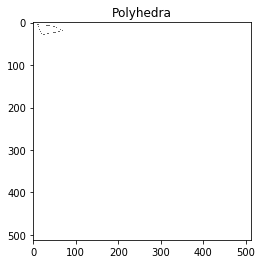

In [143]:
plt.imshow(img)
plt.title('Polyhedra')
plt.show()

In [144]:
def intersection(L1, L2):
    D  = L1[0] * L2[1] - L1[1] * L2[0]
    Dx = L1[2] * L2[1] - L1[1] * L2[2]
    Dy = L1[0] * L2[2] - L1[2] * L2[0]
    if D != 0:
        x = Dx / D
        y = Dy / D
        return x,y
    else:
        return False

In [145]:
A1

array([[ 0.58479532, -1.9354839 ],
       [ 2.3859649 ,  1.1428571 ],
       [ 0.70175439,  1.235023  ],
       [-1.0292398 ,  0.68202765],
       [-1.1695906 ,  0.05529954],
       [-1.4736842 , -1.1797235 ]])

In [146]:
b1.T

array([3.3837281, 0.9598189, 1.1496483, 2.4695071, 2.3474816, 3.6227127])

In [147]:
L1 = np.vstack([A1.T, b1])
L1 = L1.T

L2 = np.vstack([A2.T, b2])
L2 = L2.T

In [148]:
L2

array([[ 0.07017544, -2.2304147 , -0.69765812],
       [ 2.4795322 ,  0.05529954,  9.0161964 ],
       [ 1.122807  ,  1.6774194 ,  8.8853316 ],
       [-1.0994152 ,  1.124424  ,  2.4482712 ],
       [-2.5730994 , -0.62672811, -3.8164228 ]])

In [149]:
def draw_polyhedra():
    img = np.zeros((1000, 1000,3), np.uint8)
    img[:,:] = (255, 255, 255)
    
    points1 = []
    points2 = []
    
    points1.append(intersection(L1[0], L1[5]))
    points2.append(intersection(L2[0], L2[4]))
    
    for i in range(5):
        points1.append(intersection(L1[i], L1[i + 1]))
    
    for i in range(4):
        points2.append(intersection(L2[i], L2[i + 1]))
        
    points1 = np.array(points1)
    points2 = np.array(points2)
    points1 += 10
    points2 += 10
    points1 *= 50
    points2 *= 50
    print(points1)
    points1 = points1.reshape((-1,1,2))
    points2 = points2.reshape((-1,1,2))
    img = cv2.polylines(img,[points1.astype(np.int32)],True,(0, 0, 0))
    img = cv2.polylines(img,[points2.astype(np.int32)],True,(0, 0, 0))
    
    plt.imshow(img)
    plt.title('Polyhedra')
    plt.show()

[[457.37326978 399.70760421]
 [554.1474637  428.94736988]
 [497.00460871 548.24561485]
 [435.25345899 583.33333419]
 [401.15206987 531.87133419]
 [398.38709347 473.39181585]]


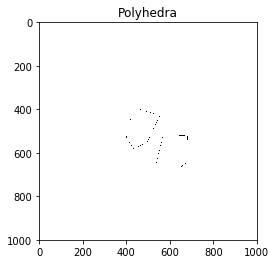

In [150]:
draw_polyhedra()